In [196]:
import scanpy as sc
import numpy as np
import pandas as pd

In [49]:
# path to SC h5ad
path_to_sc = "/space/grp/aadrian/Pseudobulk_Function_Pipeline_HighRes/bin/preprocessing/preprocessSC_pipe/data/h5ad_datasets/processed/cpm/brain_sc_with_metadata_pc_cpm.h5ad"

In [50]:
adata =sc.read_h5ad(path_to_sc)

In [51]:
# Log the data
sc.pp.log1p(adata)

In [52]:
adata.raw = adata # adata.raw now has the logCPM values

In [53]:
# get the highly variable genes for later anlysis
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/preprocessing/_highly_variable_genes.py:220: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby('mean_bin')['dispersions']


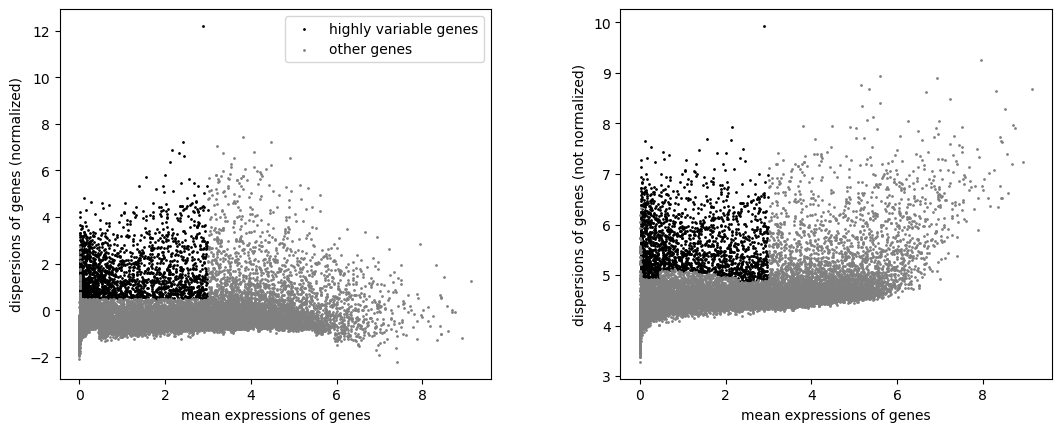

In [54]:
sc.pl.highly_variable_genes(adata)

We have to subset adata for only the highly variable genes

In [67]:
adata = adata[:,adata.var.highly_variable]

In [71]:
adata.X.shape

(76180, 1973)

regress out mitochondrial effects and library size effects. I wont do this beecause I actually think this is biologically relevant for my data

In [ ]:
# scale values
# sc.pp.scale(adata, max_value=10)

In [137]:
sc.tl.rank_genes_groups(adata, "Cell type", method='wilcoxon', use_raw=False)

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


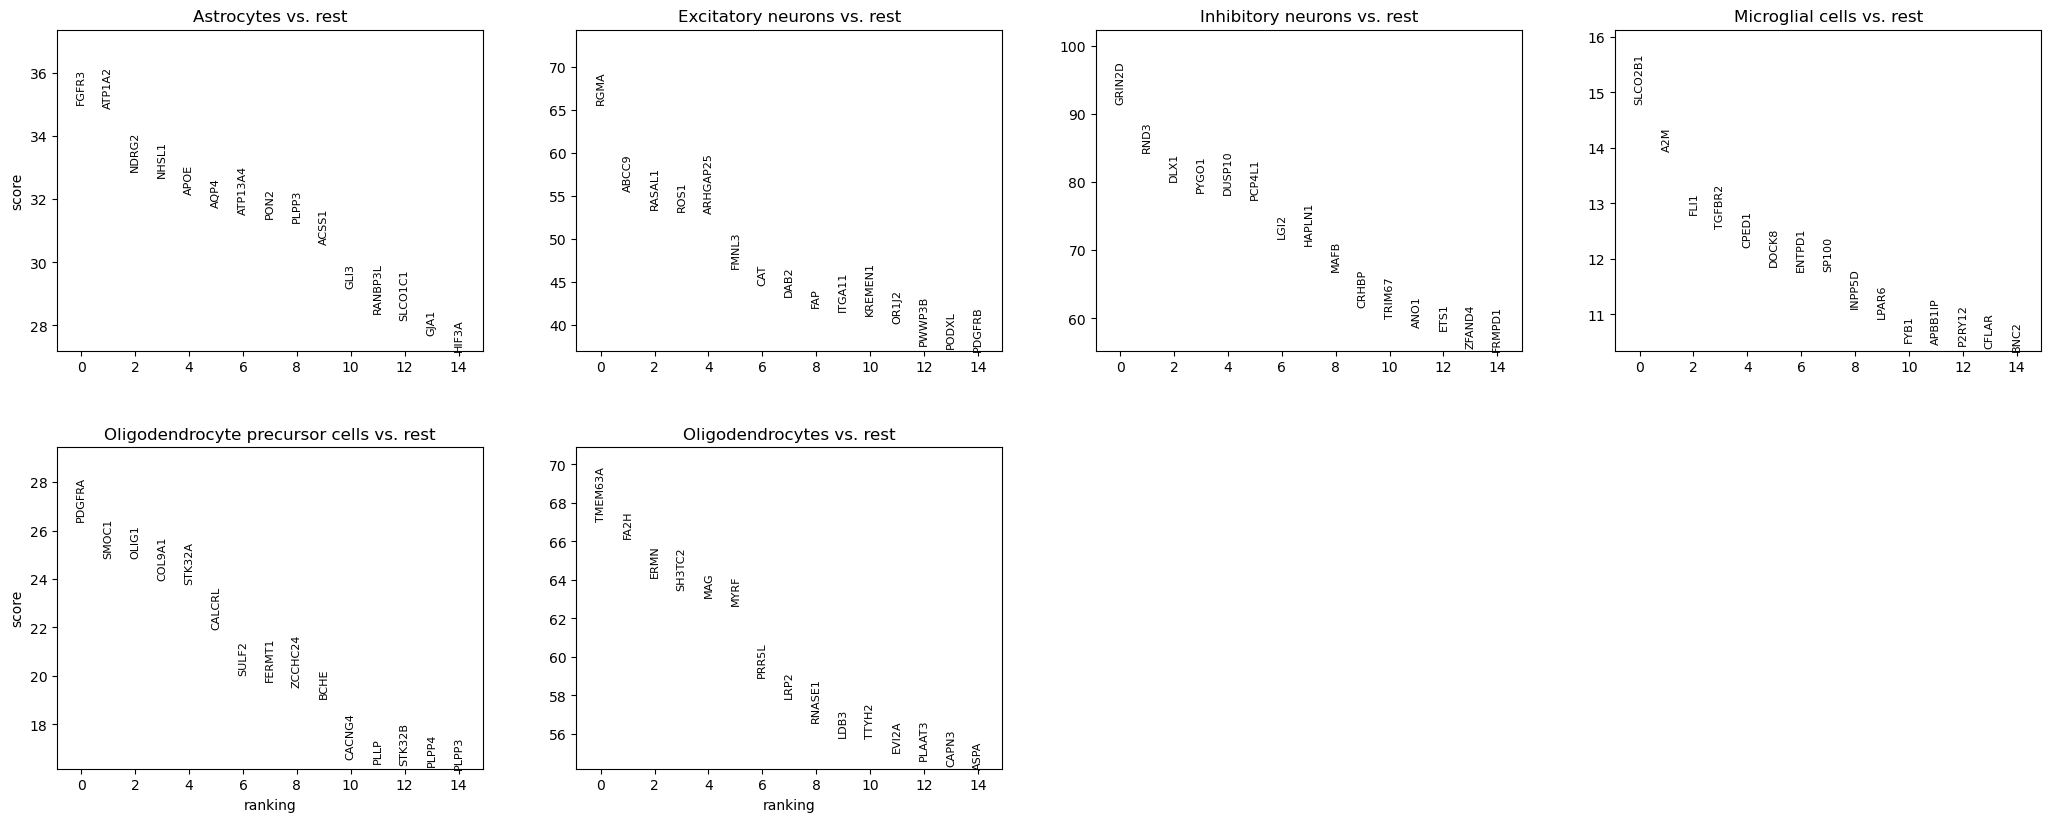

In [227]:
sc.pl.rank_genes_groups(adata, n_genes=15, sharey=False, gene_symbols="hgnc_symbol", save='faceted_markers.png')

In [229]:
# get the top 10 marker genes
marker_genes_df = pd.DataFrame(adata.uns['rank_genes_groups']['names'][0:24])
marker_genes_df.to_csv("../../data/brain_marker_genes.csv")

AnnData object with n_obs × n_vars = 76180 × 1973
    obs: 'cluster', 'umap_x', 'umap_y', 'Tissue', 'Cluster', 'Cell type', 'Cell type group', 'Cell count', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'norm_factor'
    var: 'hgnc_symbol', 'uniprotswissprot', 'entrezgene_id', 'description', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'log1p', 'hvg', 'rank_genes_groups', 'ranks', 'Cell type_colors', 'dendrogram_louvain', 'dendrogram_Cell type'
    obsm: 'X_pca'

In [199]:
def flatten_dataframe(df):
    flattened_list = []
    for column in df.columns:
        flattened_list.extend(df[column].tolist())
    return flattened_list
marker_genes = flatten_dataframe(marker_genes_df)

In [250]:
adata.var_names.isin()

Index(['ENSG00000000003', 'ENSG00000000938', 'ENSG00000000971',
       'ENSG00000001626', 'ENSG00000002586', 'ENSG00000002933',
       'ENSG00000003400', 'ENSG00000003402', 'ENSG00000003989',
       'ENSG00000004468',
       ...
       'ENSG00000278685', 'ENSG00000279408', 'ENSG00000283473',
       'ENSG00000283599', 'ENSG00000283654', 'ENSG00000283703',
       'ENSG00000283706', 'ENSG00000285975', 'ENSG00000286019',
       'ENSG00000288649'],
      dtype='object', name='ensembl_gene_id', length=1973)

In [258]:
dict_of_cts_and_markers = {}
for row_name, row_data in marker_genes_df.T.iterrows():
    adata_var_filtered = adata.var[adata.var_names.isin(row_data)]
    dict_of_cts_and_markers[row_name] = adata_var_filtered.hgnc_symbol.values
    print(adata_var_filtered.hgnc_symbol.values)

    
    

['ATP1A2', 'FGFR3', 'PRODH', 'PON2', 'GLI3', ..., 'ETNPPL', 'RANBP3L', 'HEPACAM', 'NDRG2', 'AQP4']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['ROS1', 'ABCC9', 'FAP', 'SGCG', 'RASAL1', ..., 'RGMA', 'KREMEN1', 'AIFM3', 'POU3F2', 'OR1J2']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['SLC7A2', 'FRMPD1', 'CACNG4', 'PVALB', 'HRH3', ..., 'PYGO1', 'ZFAND4', 'PRKX', 'MAFB', 'PCP4L1']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['CFLAR', 'PRKCH', 'TBXAS1', 'SP100', 'APBB1IP', ..., 'P2RY12', 'BNC2', 'PARP14', 'A2M', 'ZFP36L1']
Length: 24
Categories (1972, object): ['A2M', 'A4GALT', 'AAMDC', 'AASS', ..., 'ZNF676', 'ZNF705G', 'ZNF710', 'ZNF728']
['ARHGAP31', 'CALCRL', 'NTN1', 'CACNG4', 'FERMT1', ..., 'OLIG1', 'SULF2', 'SMOC1', 'PLPP4', 'OLIG2']
Length: 24
Categories (1972, ob

In [262]:
markers_hgnc = pd.DataFrame(dict_of_cts_and_markers)
markers_hgnc.to_csv("../../data/brain_marker_genes_hgnc.csv")

/home/aadrian/miniforge3/envs/main_env/lib/python3.9/site-packages/scanpy/plotting/_matrixplot.py:143: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  values_df = self.obs_tidy.groupby(level=0).mean()


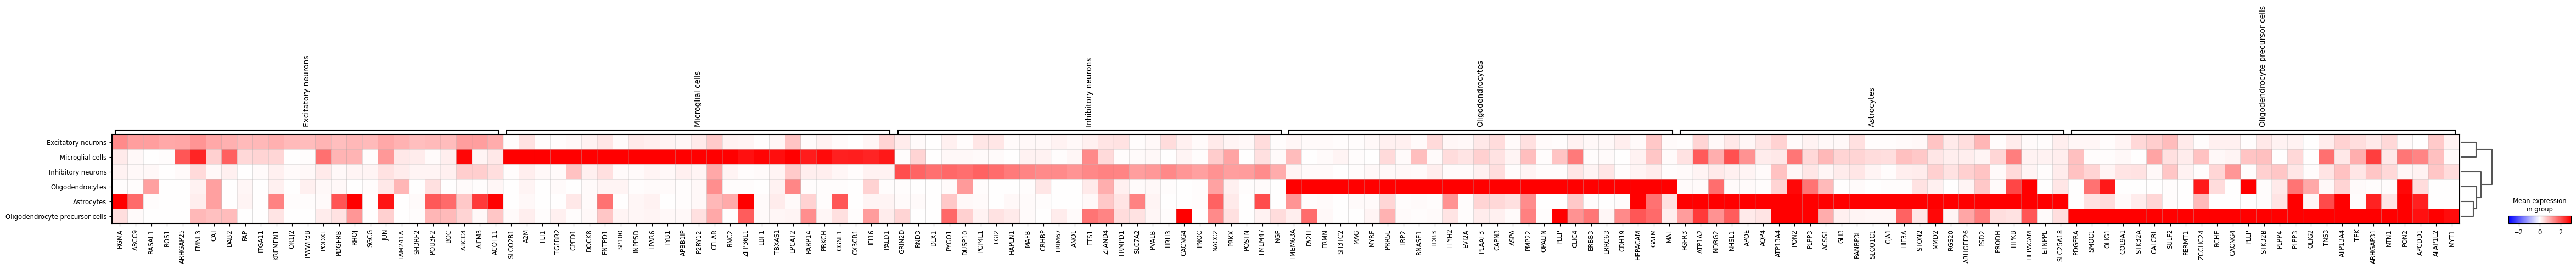

In [226]:
axs = sc.pl.rank_genes_groups_matrixplot(adata, n_genes=25, use_raw=False, vmin=-3, vmax=3, cmap='bwr', gene_symbols = 'hgnc_symbol', save = '25_marker_genes.png')